<a href="https://colab.research.google.com/github/oyaon/Machine-Learning-Using-Python/blob/main/Dataclean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dengue Cases vs. Rainfall (2023)

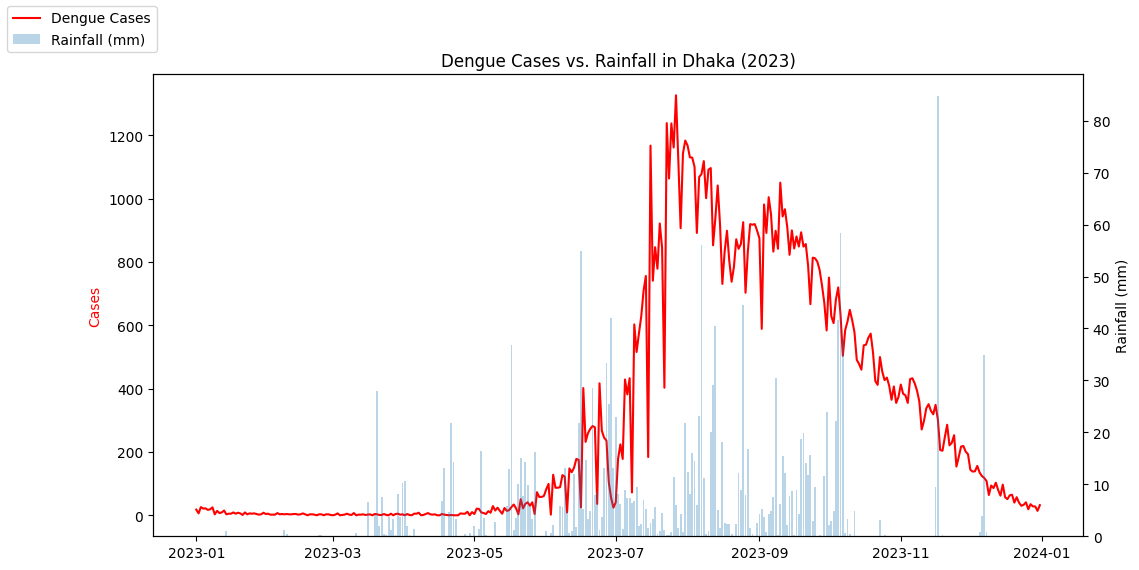

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data and filter for 2023
df = pd.read_csv("Dhaka_Weather_Case_2022-2024 - Sheet1.csv", parse_dates=["Date"])
df_2023 = df[df["Date"].dt.year == 2023]

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df_2023["Date"], df_2023["Cases"], color="red", label="Dengue Cases")
ax1.set_ylabel("Cases", color="red")

ax2 = ax1.twinx()
ax2.bar(df_2023["Date"], df_2023["Rainfall"], alpha=0.3, label="Rainfall (mm)")
ax2.set_ylabel("Rainfall (mm)")

plt.title("Dengue Cases vs. Rainfall in Dhaka (2023)")
fig.legend(loc="upper left")
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset and parse dates
df = pd.read_csv("Dhaka_Weather_Case_2022-2024 - Sheet1.csv", parse_dates=["Date"])

# Check first 5 rows
print(df.head())

        Date  TempMax  TempMin  Humidity  Rainfall  Cases
0 2022-01-01    22.90    12.66      9.98       0.0    1.0
1 2022-01-02    22.62    11.85      9.83       0.0    7.0
2 2022-01-03    22.54    11.72      9.98       0.0    4.0
3 2022-01-04    22.60    11.63      9.75       0.0    2.0
4 2022-01-05    22.53    10.62      9.05       0.0    2.0


In [4]:
# Multiply humidity by 10 to convert to percentages
df["Humidity"] = df["Humidity"] * 10

# Verify
print(df[["Date", "Humidity"]].sample(5))

           Date  Humidity
735  2024-01-06      99.4
335  2022-12-02     125.9
1061 2024-11-27     114.7
28   2022-01-29      74.4
743  2024-01-14      85.3


In [5]:
# Replace empty/missing "Cases" with NaN
df["Cases"] = df["Cases"].replace('', np.nan).astype(float)

# Interpolate missing values using neighboring dates
df["Cases"] = df["Cases"].interpolate(method="linear")

# Optional: Flag interpolated rows
df["Is_Interpolated"] = df["Cases"].isna().astype(int)
df["Cases"] = df["Cases"].fillna(-1)  # Placeholder for missing data

In [6]:
# Add a column to flag future/forecasted data
current_date = pd.Timestamp.now().normalize()  # Today's date
df["Is_Forecast"] = (df["Date"] > current_date).astype(int)

# Optional: Replace future "Cases" with NaN
df.loc[df["Is_Forecast"] == 1, "Cases"] = np.nan

In [7]:
# Calculate IQR for Rainfall
Q1 = df["Rainfall"].quantile(0.25)
Q3 = df["Rainfall"].quantile(0.75)
IQR = Q3 - Q1

# Define outliers (e.g., > 1.5*IQR)
rainfall_outliers = df[df["Rainfall"] > (Q3 + 1.5 * IQR)]
print("Rainfall Outliers:\n", rainfall_outliers[["Date", "Rainfall"]])

Rainfall Outliers:
           Date  Rainfall
168 2022-06-18      43.1
246 2022-09-04      42.5
255 2022-09-13      47.8
256 2022-09-14      50.7
296 2022-10-24     125.5
531 2023-06-16      55.0
544 2023-06-29      42.0
583 2023-08-07      56.1
601 2023-08-25      44.5
642 2023-10-05      41.7
643 2023-10-06      58.4
685 2023-11-17      84.7


In [8]:
# Flag extreme case counts (e.g., > 3 standard deviations)
mean_cases = df["Cases"].mean()
std_cases = df["Cases"].std()
df["Is_Outlier"] = (df["Cases"] > mean_cases + 3*std_cases).astype(int)

In [9]:
# Create a 14-day lagged rainfall column
df["Rainfall_Lag14"] = df["Rainfall"].shift(14)

In [10]:
# 7-day rolling sum
df["Rainfall_7d"] = df["Rainfall"].rolling(window=7).sum()

In [11]:
# Ensure correct date format
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# Remove duplicates
df = df.drop_duplicates(subset="Date", keep="first")

# Sort by date
df = df.sort_values("Date")

In [12]:
df.to_csv("Dhaka_Weather_Case_2022-2024_CLEANED.csv", index=False)

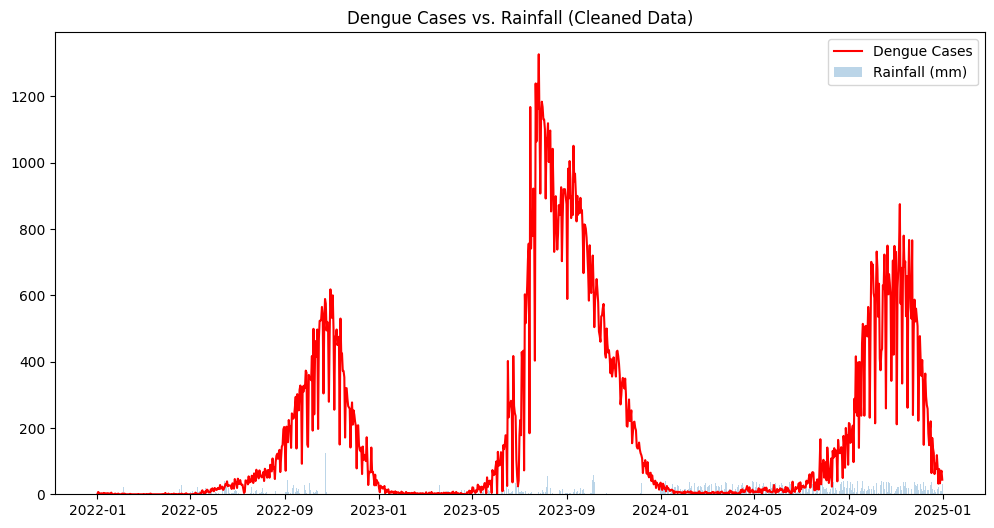

In [13]:
# Plot Cases vs. Rainfall
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Cases"], label="Dengue Cases", color="red")
plt.bar(df["Date"], df["Rainfall"], alpha=0.3, label="Rainfall (mm)")
plt.title("Dengue Cases vs. Rainfall (Cleaned Data)")
plt.legend()
plt.show()

In [14]:
df['Humidity'] = df['Humidity'].clip(upper=100.0)  # Cap humidity at 100%

In [15]:
rainfall_columns = ['Rainfall', 'Rainfall_Lag14', 'Rainfall_7d']
df[rainfall_columns] = df[rainfall_columns].round(1)

In [16]:
df['Cases'] = df['Cases'].astype(int)

In [17]:
date_range = pd.date_range(start='2022-01-01', end='2024-12-31')
missing_dates = date_range[~date_range.isin(df['Date'])]

In [18]:
duplicates = df[df.duplicated(subset=['Date'], keep=False)]
if not duplicates.empty:
    df = df.drop_duplicates(subset=['Date'])

In [19]:
df['Temp_Is_Extreme'] = (df['TempMax'] > 45) | (df['TempMin'] < 5)

In [20]:
df['Rainfall_Lag14'] = df['Rainfall_Lag14'].interpolate(method='linear')

In [21]:
def validate_data(df):
    assert (df['Humidity'] <= 100).all(), "Humidity exceeds 100%"
    assert df['Date'].is_monotonic_increasing, "Dates are not sequential"
    print("All checks passed!")
validate_data(df)

All checks passed!


In [22]:
df['Temp_Is_Extreme'] = (df['TempMax'] > 45) | (df['TempMin'] < 5)

In [23]:
df[['Rainfall', 'Rainfall_Lag14', 'Rainfall_7d']] = df[['Rainfall', 'Rainfall_Lag14', 'Rainfall_7d']].round(1)

In [24]:
df['Cases'] = df['Cases'].astype(int)

In [25]:
def validate_data(df):
    # Check humidity ≤ 100%
    assert (df['Humidity'] <= 100).all(), "Humidity exceeds 100%"

    # Check dates are complete and sequential
    full_date_range = pd.date_range(start='2022-01-01', end='2024-12-31')
    missing_dates = full_date_range[~full_date_range.isin(df['Date'])]
    assert len(missing_dates) == 0, f"Missing dates: {missing_dates}"

    # Check Cases are integers
    assert (df['Cases'] == df['Cases'].astype(int)).all(), "Non-integer values in Cases"

    print("Validation passed!")

validate_data(df)

Validation passed!


In [26]:
df.to_csv('Dhaka_Weather_CLEANED.csv', index=False)